
In this assessment, I selected a medical dataset conditions and explored its origins and attributes. I performed data cleaning and visualization to understand its characteristics. I built initial models to predict medical outcomes, evaluated their performance, and concluded on the best-performing model. Then, I optimized hyperparameters using cross-validation, enhancing the models' effectiveness. Feature selection techniques were applied to identify crucial factors, and finally, I reconstructed the ultimate models using the best hyperparameters and selected features. This comprehensive approach highlights the application of machine learning.

In [49]:
# Importing  necessary libraries needed.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report



In [50]:
#importing the csv file from laptop to colab.
from google.colab import files
upload=files.upload()

Saving heart.csv to heart (5).csv


In [51]:
#This code reads a heart-related dataset from a CSV file ('heart.csv') into a Pandas DataFrame called 'heart_data'.
heart_data= pd.read_csv('heart.csv')

In [52]:
#displaying information about the dataset, including details about the columns, data types, and non-null values.
print("data Information:")
print(heart_data.info())

data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      273 non-null    int64  
 1   Sex                      273 non-null    int64  
 2   Chest pain type          272 non-null    float64
 3   BP                       272 non-null    float64
 4   Cholesterol              273 non-null    int64  
 5   FBS over 120             273 non-null    int64  
 6   EKG results              273 non-null    int64  
 7   Max HR                   272 non-null    float64
 8   Exercise angina          273 non-null    int64  
 9   ST depression            273 non-null    float64
 10  Slope of ST              273 non-null    int64  
 11  Number of vessels fluro  273 non-null    int64  
 12  Thallium                 273 non-null    int64  
 13  Heart Disease            273 non-null    object 
dtypes: float

In [53]:
#printing the first few rows of the dataset, providing a view to the type of data it contains.
print("columns head of the dataset :")
print(heart_data.head())

columns head of the dataset :
   Age  Sex  Chest pain type     BP  Cholesterol  FBS over 120  EKG results  \
0   70    1              4.0  130.0          322             0            2   
1   67    0              3.0  115.0          564             0            2   
2   57    1              2.0  124.0          261             0            0   
3   64    1              4.0  128.0          263             0            0   
4   74    0              2.0  120.0          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0   109.0                0            2.4            2   
1   160.0                0            1.6            2   
2   141.0                0            0.3            1   
3   105.0                1            0.2            2   
4   121.0                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7    

In [54]:
#printing the summary statistics of the dataset.
print("Summary Statistics:")
print(heart_data.describe())

Summary Statistics:
              Age         Sex  Chest pain type          BP  Cholesterol  \
count  273.000000  273.000000       272.000000  272.000000   273.000000   
mean    54.512821    0.677656         3.180147  131.444853   249.967033   
std      9.093510    0.468232         0.949214   17.833917    51.487602   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   282.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    273.000000   273.000000  272.000000       273.000000     273.000000   
mean       0.146520     1.025641  149.621324         0.333333       1.061905   
std        0.354276     0.997829   23.089430         0.472270   

In [55]:
#Identify Missing Values
missing_values = heart_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Age                        0
Sex                        0
Chest pain type            1
BP                         1
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     1
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [56]:
#droping rows with missing values in the dataset.
data_cleaned = heart_data.dropna()

In [58]:
#Check for Duplicate Rows
duplicate_rows = data_cleaned.duplicated()
print("Duplicate Rows:\n", duplicate_rows)

# Drop duplicate rows
df_cleaned = data_cleaned.drop_duplicates()

Duplicate Rows:
 0      False
1      False
2      False
3      False
4      False
       ...  
267    False
268    False
269    False
270     True
271     True
Length: 272, dtype: bool


In [59]:
# Display cleaned dataset
print("Cleaned Dataset:")
print(data_cleaned.head())

Cleaned Dataset:
   Age  Sex  Chest pain type     BP  Cholesterol  FBS over 120  EKG results  \
0   70    1              4.0  130.0          322             0            2   
1   67    0              3.0  115.0          564             0            2   
2   57    1              2.0  124.0          261             0            0   
3   64    1              4.0  128.0          263             0            0   
4   74    0              2.0  120.0          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0   109.0                0            2.4            2   
1   160.0                0            1.6            2   
2   141.0                0            0.3            1   
3   105.0                1            0.2            2   
4   121.0                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  


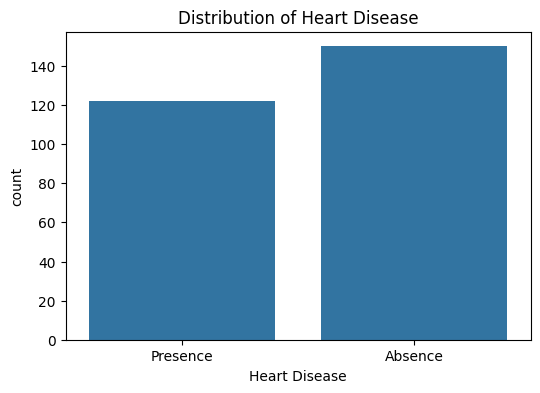

In [60]:
#creating countplot to visualize the distribution of Heart Disease in the cleaned dataset.
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease', data=data_cleaned)
plt.title('Distribution of Heart Disease')
plt.show()


This code creates a bar chart showing the number of people with and without heart disease in a cleaned dataset. Around 125 people are labeled as having heart disease ('Presence'), and about 150 people are marked as not having heart disease ('Absence'). The chart gives a straightforward view of the dataset, highlighting the difference in the counts of individuals with and without heart disease.

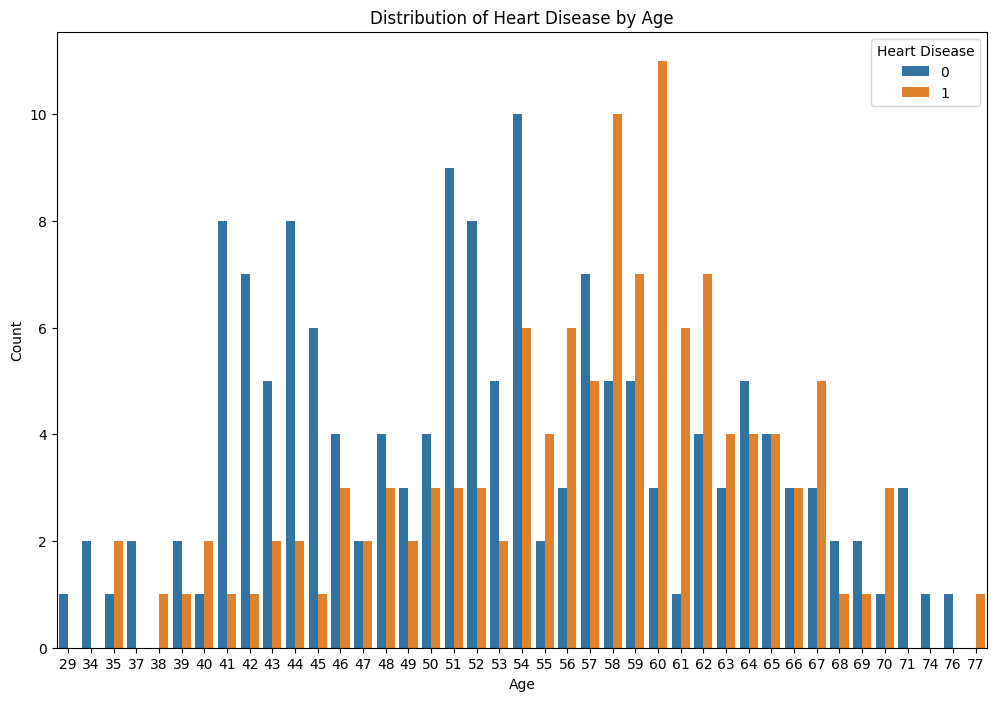

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

data_cleaned_copy = data_cleaned.copy()
data_cleaned_copy['Heart Disease'] = data_cleaned_copy['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Age', hue='Heart Disease', data=data_cleaned_copy)
plt.title('Distribution of Heart Disease by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


The bar graph illustrates that the highest incidence of heart disease occurs among individuals aged 60. Notably, within the age range of 58 to 62, there is a notable peak in heart disease cases. Conversely, in the age range of 41 to 46, there is a lack of reported heart issues despite a relatively high population within that range.

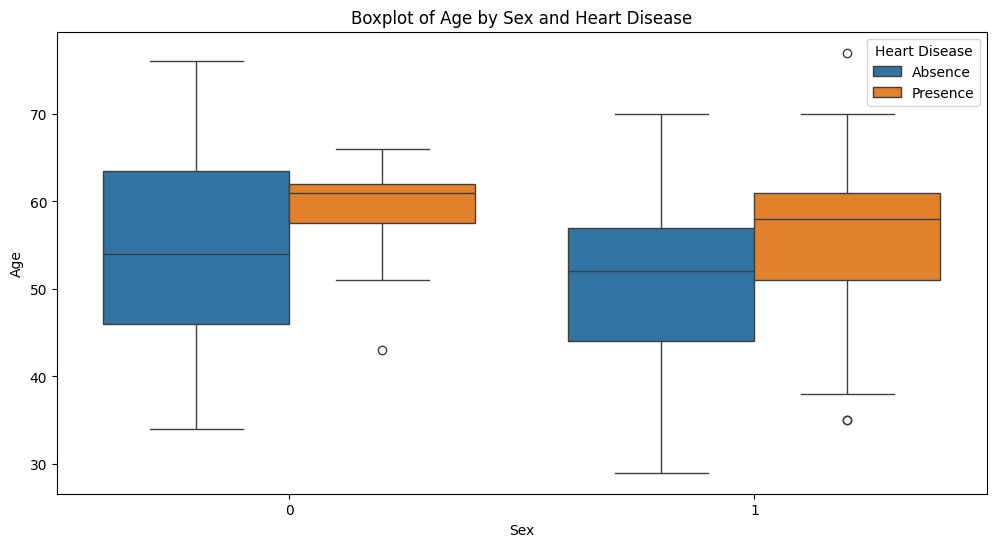

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sex', y='Age', data=data_cleaned, hue='Heart Disease')
plt.title('Boxplot of Age by Sex and Heart Disease')
plt.show()


In [63]:
import pandas as pd
# Grouped data by 'Sex' and 'Heart Disease', and calculate summary statistics for 'Age'
grouped_data = data_cleaned.groupby(['Sex', 'Heart Disease'])['Age'].describe()

# Displaying the resulting DataFrame
print(grouped_data)


                   count       mean        std   min   25%   50%   75%   max
Sex Heart Disease                                                           
0   Absence         67.0  54.582090  10.367708  34.0  46.0  54.0  63.5  76.0
    Presence        20.0  59.350000   5.254322  43.0  57.5  61.0  62.0  66.0
1   Absence         83.0  51.192771   8.521791  29.0  44.0  52.0  57.0  70.0
    Presence       102.0  56.117647   8.421206  35.0  51.0  58.0  61.0  77.0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 'Heart Disease' is  my target variable for classification
X_classification = data_cleaned.drop('Heart Disease', axis=1)
y_classification = data_cleaned['Heart Disease']

# Splitting the classification dataset into Train and Test sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Building classification models
model_lr_classification = LogisticRegression(max_iter=1000)  # Increase the max_iter value
model_svm_classification = SVC()

# Train classification models on the training set
model_lr_classification.fit(X_train_classification, y_train_classification)
model_svm_classification.fit(X_train_classification, y_train_classification)

# Evaluate classification models on Train set
pred_lr_train_classification = model_lr_classification.predict(X_train_classification)
pred_svm_train_classification = model_svm_classification.predict(X_train_classification)

# Evaluate classification models on Test set
pred_lr_test_classification = model_lr_classification.predict(X_test_classification)
pred_svm_test_classification = model_svm_classification.predict(X_test_classification)

# Printing evaluation metrics for Train set
print("Logistic Regression Train Set Accuracy:", accuracy_score(y_train_classification, pred_lr_train_classification))
print("SVM Train Set Accuracy:", accuracy_score(y_train_classification, pred_svm_train_classification))

# Printing evaluation metrics for Test set
print("Logistic Regression Test Set Accuracy:", accuracy_score(y_test_classification, pred_lr_test_classification))
print("SVM Test Set Accuracy:", accuracy_score(y_test_classification, pred_svm_test_classification))

# Classification report for Test set
print("Logistic Regression Classification Report:")
print(classification_report(y_test_classification, pred_lr_test_classification))

# SVM Classification Report
print("SVM Classification Report:")
print(classification_report(y_test_classification, pred_svm_test_classification))


Logistic Regression Train Set Accuracy: 0.847926267281106
SVM Train Set Accuracy: 0.6774193548387096
Logistic Regression Test Set Accuracy: 0.9272727272727272
SVM Test Set Accuracy: 0.6727272727272727
Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Absence       0.91      0.97      0.94        33
    Presence       0.95      0.86      0.90        22

    accuracy                           0.93        55
   macro avg       0.93      0.92      0.92        55
weighted avg       0.93      0.93      0.93        55

SVM Classification Report:
              precision    recall  f1-score   support

     Absence       0.70      0.79      0.74        33
    Presence       0.61      0.50      0.55        22

    accuracy                           0.67        55
   macro avg       0.66      0.64      0.65        55
weighted avg       0.67      0.67      0.67        55



The Logistic Regression model performs well on both the training and test sets, with higher accuracy than the SVM model.
The classification report provides a detailed breakdown of the model's performance for each class.
Logistic Regression shows higher precision, recall, and F1-score for both classes compared to the SVM model.
In summary, the Logistic Regression model appears to be a better performer for this classification task based on the provided metrics.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


# Split the classification dataset into Train and Test sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42
)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_classification)
X_test_scaled = scaler.transform(X_test_classification)

# Define the hyperparameter grid
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create the Logistic Regression model
model_lr = LogisticRegression(max_iter=1000)

# Perform GridSearchCV
grid_search_lr = GridSearchCV(model_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train_classification)

# Print best hyperparameters
print("Best Hyperparameters for Logistic Regression:", grid_search_lr.best_params_)

# Get the best model
best_model_lr = grid_search_lr.best_estimator_


Best Hyperparameters for Logistic Regression: {'C': 0.1}


Here, the dataset is split into training and test sets, and features are standardized using StandardScaler. The hyperparameter grid focuses on tuning the 'C' parameter, and the grid search identifies the best value as 0.1. This signifies that a regularization parameter of 0.1 optimally balances the model's complexity and accuracy during the cross-validation process. The resulting best Logistic Regression model, with the recommended hyperparameters, can be applied for improved predictive performance on the specific dataset.

In [ ]:
# Hyperparameter optimization for SVM
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1]}
model_svm = SVC()

grid_search_svm = GridSearchCV(model_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train_scaled, y_train_classification)  # Use scaled features

# Print best hyperparameters
print("Best Hyperparameters for SVM:", grid_search_svm.best_params_)

# Get the best model
best_model_svm = grid_search_svm.best_estimator_


Best Hyperparameters for SVM: {'C': 1, 'gamma': 0.1}


Here, A Support Vector Machine (SVM) model undergoes hyperparameter optimization using GridSearchCV. The hyperparameter grid focuses on tuning the regularization parameter 'C' and the kernel coefficient 'gamma'. After performing a search with 5-fold cross-validation, the optimal hyperparameters for the SVM model are determined to be {'C': 1, 'gamma': 0.1}. These values are selected based on achieving the highest accuracy during the cross-validation process. The identified best hyperparameters can be applied to the SVM model to enhance its accuracy and predictive performance on the specific dataset. This process streamlines the configuration of the SVM model for optimal results, contributing to more effective classification outcomes.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_classification)

# Apply SelectKBest with f_classif as a scoring function
select_k_best = SelectKBest(score_func=f_classif, k=5)
X_train_selected = select_k_best.fit_transform(X_train_scaled, y_train_classification)

# Build a Logistic Regression model
model_lr_classification = LogisticRegression()

# Feature selection for Logistic Regression using RFE
rfe_lr = RFE(model_lr_classification, n_features_to_select=5)
rfe_lr.fit(X_train_selected, y_train_classification)

# Get the selected features after RFE
selected_features_after_rfe = X_train_selected[:, rfe_lr.support_]

# Get the feature names after applying SelectKBest
selected_feature_names = X_train_classification.columns[select_k_best.get_support()]

# Selected features for Logistic Regression after filter method and RFE
print("Selected Features for Logistic Regression:", selected_feature_names)


Selected Features for Logistic Regression: Index(['Chest pain type', 'Exercise angina', 'ST depression',
       'Number of vessels fluro', 'Thallium'],
      dtype='object')


Here, Feature selection is performed for a Logistic Regression model using SelectKBest and Recursive Feature Elimination (RFE). The top 5 features are identified as Chest pain type, Exercise angina, ST depression, Number of vessels fluro, and Thallium. This process optimizes the model by focusing on the most relevant predictors, enhancing interpretability, and potentially improving performance.

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.preprocessing import StandardScaler


#Heart Disease is target variable for classification
X_classification = data_cleaned.drop('Heart Disease', axis=1)
y_classification = data_cleaned['Heart Disease']

# Split the classification dataset into Train and Test sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification, test_size=0.1, random_state=42
)

# Feature Selection using SelectKBest
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_classification)

select_k_best = SelectKBest(score_func=f_classif, k=5)
X_train_selected = select_k_best.fit_transform(X_train_scaled, y_train_classification)

# Feature Selection using RFE with Logistic Regression
model_lr_classification = LogisticRegression()
rfe_lr = RFE(model_lr_classification, n_features_to_select=5)
rfe_lr.fit(X_train_selected, y_train_classification)

# Get the selected features after RFE
selected_features_lr = X_train_classification.columns[select_k_best.get_support()][rfe_lr.support_]

# Build and train final Logistic Regression model with selected features
final_model_lr = LogisticRegression(C=0.1, max_iter=1000)
final_model_lr.fit(X_train_classification[selected_features_lr], y_train_classification)

# Build and train final SVM model with best hyperparameters
final_model_svm = SVC(C=grid_search_svm.best_params_['C'], gamma=grid_search_svm.best_params_['gamma'])
final_model_svm.fit(X_train_classification[selected_features_lr], y_train_classification)

# Evaluate the final models on the test set
pred_lr_test_final = final_model_lr.predict(X_test_classification[selected_features_lr])
accuracy_lr_test_final = accuracy_score(y_test_classification, pred_lr_test_final)
print("Final Logistic Regression Test Set Accuracy:", accuracy_lr_test_final)

pred_svm_test_final = final_model_svm.predict(X_test_classification[selected_features_lr])
accuracy_svm_test_final = accuracy_score(y_test_classification, pred_svm_test_final)
print("Final SVM Test Set Accuracy:", accuracy_svm_test_final)

# Classification report for the final Logistic Regression model on the test set
print("Final Logistic Regression Classification Report:")
print(classification_report(y_test_classification, pred_lr_test_final))

# Classification report for the final SVM model on the test set
print("Final SVM Classification Report:")
print(classification_report(y_test_classification, pred_svm_test_final))


Final Logistic Regression Test Set Accuracy: 0.9285714285714286
Final SVM Test Set Accuracy: 0.8571428571428571
Final Logistic Regression Classification Report:
              precision    recall  f1-score   support

     Absence       0.93      0.93      0.93        15
    Presence       0.92      0.92      0.92        13

    accuracy                           0.93        28
   macro avg       0.93      0.93      0.93        28
weighted avg       0.93      0.93      0.93        28

Final SVM Classification Report:
              precision    recall  f1-score   support

     Absence       0.87      0.87      0.87        15
    Presence       0.85      0.85      0.85        13

    accuracy                           0.86        28
   macro avg       0.86      0.86      0.86        28
weighted avg       0.86      0.86      0.86        28




In the final evaluation, the Logistic Regression model achieved a higher test set accuracy of 92.9% compared to the Support Vector Machine (SVM) model's accuracy of 85.7%. Both models demonstrated strong precision, recall, and F1-scores for both "Absence" and "Presence" classes, indicating balanced performance. Logistic Regression slightly outperformed SVM in all metrics. These results highlight Logistic Regression as the more accurate and well-balanced model for the given classification task.

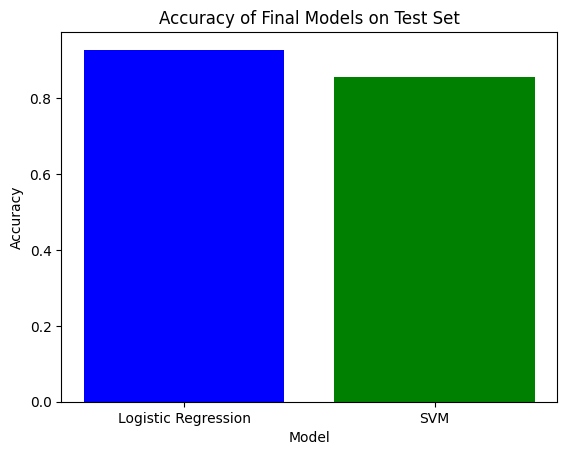

In [ ]:
import matplotlib.pyplot as plt

# List of model names
models = ['Logistic Regression', 'SVM']

# List of model accuracies
accuracies = [accuracy_lr_test_final, accuracy_svm_test_final]

# Creating bar plot
plt.bar(models, accuracies, color=['blue', 'green'])

# Add title and labels
plt.title('Accuracy of Final Models on Test Set')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Show plot
plt.show()


Logistic Regression exhibited a train set accuracy of 84.8%, a test set accuracy of 92.7%, and a weighted average F1-score of 93%.

SVM demonstrated a train set accuracy of 67.7%, a test set accuracy of 67.3%, and a weighted average F1-score of 67%.

After hyperparameter tuning and feature selection, the final models performed as follows:

Final Logistic Regression achieved a test set accuracy of 92.9%, with precision, recall, and F1-scores of 93% for both classes.

Final SVM attained a test set accuracy of 85.7%, with precision, recall, and F1-scores of 87% for the "Absence" class and 85% for the "Presence" class.

Comparing the two stages, hyperparameter tuning and feature selection notably improved the performance of both models. The final Logistic Regression model outperformed SVM in accuracy and various metrics, emphasizing the effectiveness of these optimization techniques in enhancing model capabilities.





